In [1]:
import pandas as pd
import numpy as np

from sklearn.ensemble import AdaBoostClassifier

from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import confusion_matrix, classification_report

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("heart.csv")

In [3]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [4]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

### Train Test Split

In [7]:
df["target"].value_counts()

1    165
0    138
Name: target, dtype: int64

In [5]:
x = df.drop("target", axis = 1)

In [6]:
y = df["target"]

In [8]:
x_train, x_test, y_train, y_test = train_test_split(x,y,random_state=33,stratify=y)

In [9]:
x_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
211,61,1,0,120,260,0,1,140,1,3.6,1,1,3
246,56,0,0,134,409,0,0,150,1,1.9,1,2,3
119,46,0,0,138,243,0,0,152,1,0.0,1,0,2
236,58,1,0,125,300,0,0,171,0,0.0,2,2,3
201,60,1,0,125,258,0,0,141,1,2.8,1,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
100,42,1,3,148,244,0,0,178,0,0.8,2,2,2
122,41,0,2,112,268,0,0,172,1,0.0,2,0,2
56,48,1,0,122,222,0,0,186,0,0.0,2,0,2
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1


In [12]:
x_test

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
55,52,1,1,134,201,0,1,158,0,0.8,2,1,2
124,39,0,2,94,199,0,1,179,0,0.0,2,0,2
109,50,0,0,110,254,0,0,159,0,0.0,2,0,2
142,42,0,2,120,209,0,1,173,0,0.0,1,0,2
176,60,1,0,117,230,1,1,160,1,1.4,2,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
198,62,1,0,120,267,0,1,99,1,1.8,1,2,3
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3
10,54,1,0,140,239,0,1,160,0,1.2,2,0,2
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2


In [14]:
y_train.value_counts()

1    124
0    103
Name: target, dtype: int64

In [15]:
y_test.value_counts()

1    41
0    35
Name: target, dtype: int64

In [10]:
x_train.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
count,227.000000,227.000000,227.000000,227.000000,227.000000,227.000000,227.000000,227.000000,227.000000,227.000000,227.000000,227.000000,227.000000
mean,54.229075,0.669604,0.938326,131.748899,246.925110,0.158590,0.537445,149.356828,0.361233,1.088987,1.370044,0.682819,2.325991
std,9.102681,0.471395,1.041477,17.431876,53.681778,0.366101,0.533944,22.362470,0.481420,1.221059,0.641197,1.002570,0.637600
min,29.000000,0.000000,0.000000,100.000000,126.000000,0.000000,0.000000,88.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.000000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,136.000000,0.000000,0.000000,1.000000,0.000000,2.000000
50%,56.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000
75%,61.000000,1.000000,2.000000,140.000000,273.000000,0.000000,1.000000,165.000000,1.000000,1.800000,2.000000,1.000000,3.000000
max,76.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000


### Model Training

In [26]:
ab_model = AdaBoostClassifier()
ab_model.fit(x_train,y_train)

AdaBoostClassifier()

### Model Evaluation

#### On Test Data

In [19]:
y_pred = ab_model.predict(x_test)

conf_matrix = confusion_matrix(y_test,y_pred)
print("Confusion Matrix: ")
print(conf_matrix)
print()
print("Classification Report: ")
print(classification_report(y_test,y_pred))

Confusion Matrix: 
[[25 10]
 [ 6 35]]

Classification Report: 
              precision    recall  f1-score   support

           0       0.81      0.71      0.76        35
           1       0.78      0.85      0.81        41

    accuracy                           0.79        76
   macro avg       0.79      0.78      0.79        76
weighted avg       0.79      0.79      0.79        76



#### On Train Data

In [20]:
y_pred_train = ab_model.predict(x_train)

conf_matrix = confusion_matrix(y_train,y_pred_train)
print("Confusion Matrix: ")
print(conf_matrix)
print()
print("Classification Report: ")
print(classification_report(y_train,y_pred_train))

Confusion Matrix: 
[[ 97   6]
 [  5 119]]

Classification Report: 
              precision    recall  f1-score   support

           0       0.95      0.94      0.95       103
           1       0.95      0.96      0.96       124

    accuracy                           0.95       227
   macro avg       0.95      0.95      0.95       227
weighted avg       0.95      0.95      0.95       227



### Feature Selection / Feature Importance

<AxesSubplot:>

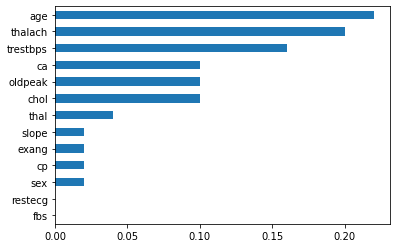

In [27]:
# ab_model.feature_importances_
feature_importance_series = pd.Series(ab_model.feature_importances_, index = x.columns)
feature_importance_series.sort_values().plot(kind = "barh")

### Hyperparamter Tuning

In [32]:
ab_model = AdaBoostClassifier()

param_grid = {"n_estimators":np.arange(10,100),
             "learning_rate":np.arange(0,2,0.001)}

rscv_ab_model = RandomizedSearchCV(ab_model,param_grid,cv = 3)
rscv_ab_model.fit(x_train,y_train)
rscv_ab_model.best_estimator_

AdaBoostClassifier(learning_rate=0.016, n_estimators=59)

In [33]:
new_ab_model = rscv_ab_model.best_estimator_
new_ab_model.fit(x_train,y_train)

AdaBoostClassifier(learning_rate=0.016, n_estimators=59)

### Model Evaluation

#### On Test Data

In [34]:
y_pred = new_ab_model.predict(x_test)

conf_matrix = confusion_matrix(y_test,y_pred)
print("Confusion Matrix: ")
print(conf_matrix)
print()
print("Classification Report: ")
print(classification_report(y_test,y_pred))

Confusion Matrix: 
[[24 11]
 [ 5 36]]

Classification Report: 
              precision    recall  f1-score   support

           0       0.83      0.69      0.75        35
           1       0.77      0.88      0.82        41

    accuracy                           0.79        76
   macro avg       0.80      0.78      0.78        76
weighted avg       0.79      0.79      0.79        76



#### On Train Data

In [35]:
y_pred_train = new_ab_model.predict(x_train)

conf_matrix = confusion_matrix(y_train,y_pred_train)
print("Confusion Matrix: ")
print(conf_matrix)
print()
print("Classification Report: ")
print(classification_report(y_train,y_pred_train))

Confusion Matrix: 
[[ 84  19]
 [ 17 107]]

Classification Report: 
              precision    recall  f1-score   support

           0       0.83      0.82      0.82       103
           1       0.85      0.86      0.86       124

    accuracy                           0.84       227
   macro avg       0.84      0.84      0.84       227
weighted avg       0.84      0.84      0.84       227



<AxesSubplot:>

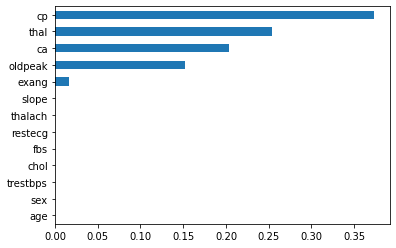

In [36]:
feature_importance_series = pd.Series(new_ab_model.feature_importances_, index = x.columns)
feature_importance_series.sort_values().plot(kind = "barh")

In [38]:
ab_model = AdaBoostClassifier()

param_grid = {"n_estimators":np.arange(10,100),
             "learning_rate":np.arange(0,2,0.001)}

gscv_ab_model = GridSearchCV(ab_model,param_grid,cv = 3)
gscv_ab_model.fit(x_train,y_train)
gscv_ab_model.best_estimator_

In [ ]:
## What is adaboost
## How does it work
## How does it differ from Bagging 
## Difference between bagging and boosting